# Saturdays.AI Guadalajara 4a Ed.
### Feature Extraction PCA

#### Luis Román

#### Septiembre de 2022

Scikit-Learn es una de las librerías más importantes para Machine Learning en Python. De código abierto, está basada en Numpy, Pandas, SciPy y matplotlib entre otras. Cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad.

Documentación:
https://scikit-learn.org/stable/

In [1]:
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib


# Scikit Learn

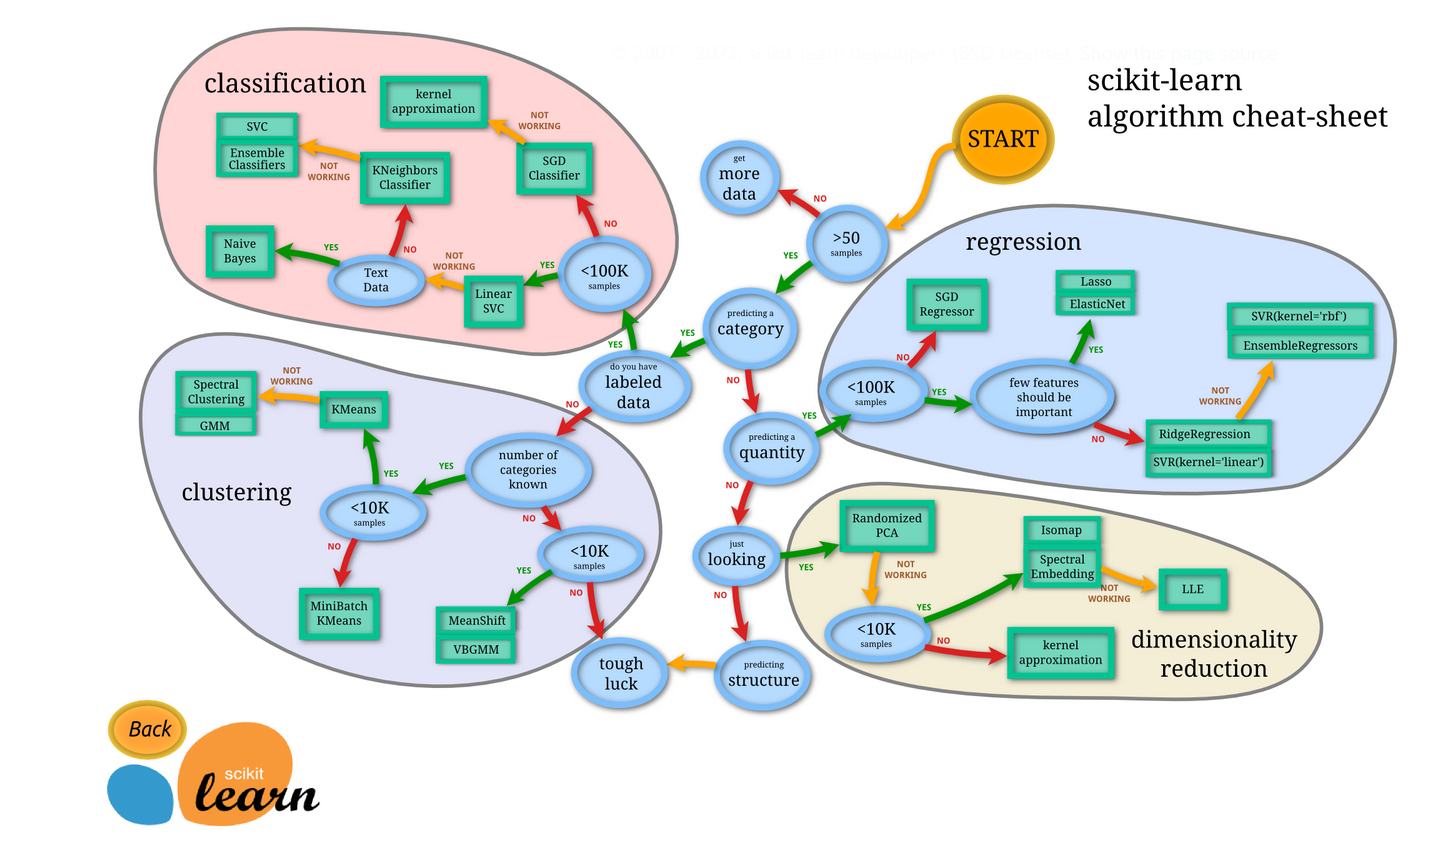
(Créditos scikit-learn.org)

In [2]:
# Importación de librerías
import numpy as np
import pandas as pd
# Graficación
import matplotlib.pyplot as plt
import seaborn as sns
# Transformación de datos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# Extracción de características PCA
from sklearn.decomposition import PCA

# Contexto de los datos

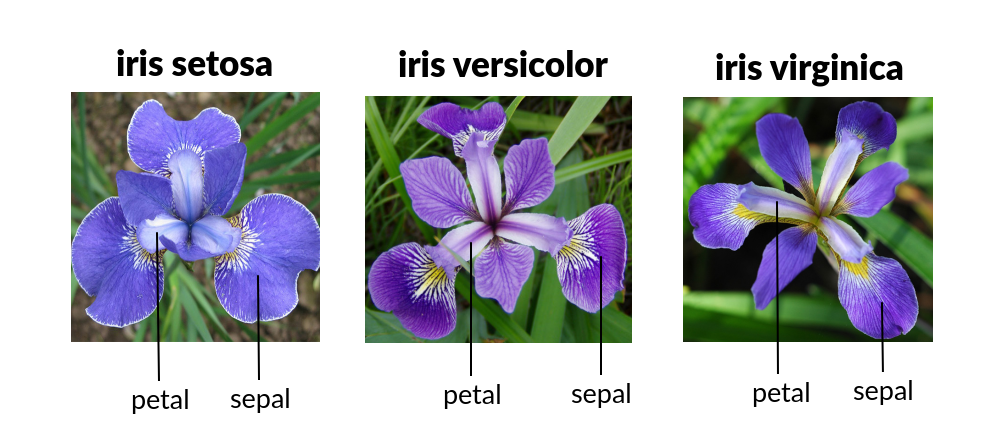
(Créditos Zena Sporer)

Obtenido por Ronald Fisher, este dataset contiene medidas de longitud y ancho de pétalos y sépalos de flores de tres especies de Iris. Es uno de los datasets más clásicos en el mundo del Machine Learning.

Lo contienen diversas librerías y se conforma de 50 muestras de cada especie: setosa, setosa, versicolor, virginica.

Referencias:
https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x

## Carga del dataset

In [3]:
# Carga de dataset
df = pd.read_csv('../data/iris.csv')

# Verificación de valores
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

### Descubrimiento de los datos

In [4]:
# Obtener la información de las características e integridad de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Estadísticos básicos
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [6]:
# Verificación de valores vacíos
print(df.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [7]:
# Eliminación del id, ya que no será considerado por el modelo
df.drop(columns = ['Id'], axis = 1, inplace = True)
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

In [8]:
# Conteo de especies
print("Las especies únicas en el dataset son:", df['Species'].unique())

Las especies únicas en el dataset son: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Visualización de los datos

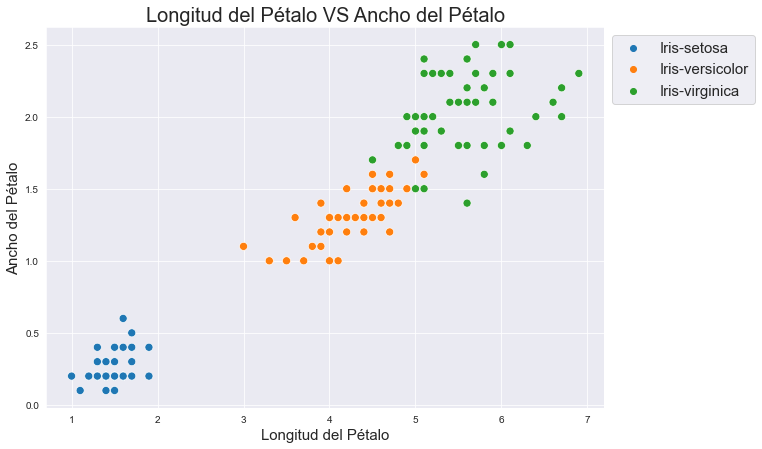

In [9]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = df, s = 65)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, fontsize = 15)
plt.title('Longitud del Pétalo VS Ancho del Pétalo', fontsize = 20)
plt.xlabel('Longitud del Pétalo', fontsize = 15)
plt.ylabel('Ancho del Pétalo', fontsize = 15)
plt.show()

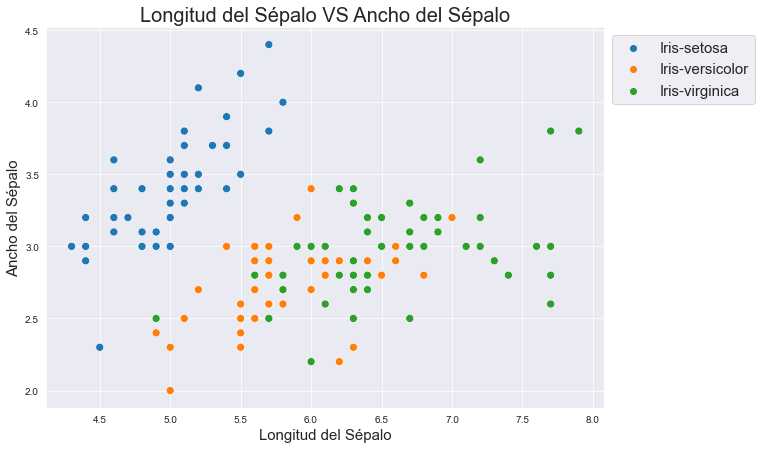

In [10]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df, s = 65)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, fontsize = 15)
plt.title('Longitud del Sépalo VS Ancho del Sépalo', fontsize = 20)
plt.xlabel('Longitud del Sépalo', fontsize = 15)
plt.ylabel('Ancho del Sépalo', fontsize = 15)
plt.show()

### Correlación de los datos

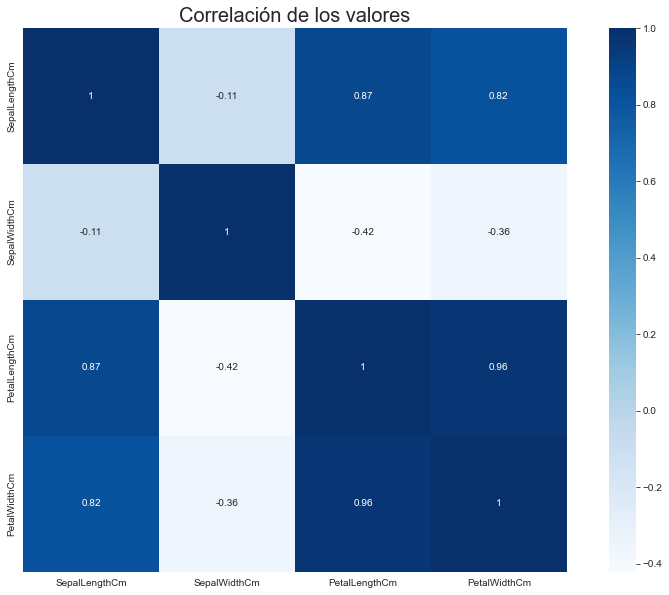

In [11]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Correlación de los valores", size = 20)
plt.show()

### Manejo y escalado de los datos

In [12]:
# Separación de los datos en conjuntos de características y característica a predecir
X = df.drop(['Species'], axis = 1)
y = df['Species']
print(X)
print("--"*35)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
----------------------------------------------------------------------
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    

#### Escalado de los datos

El escalado de datos es importante debido a los siguientes puntos:
- Requisito del modelo
- Mejoramiento de la precisión
- Ahorro de procesamiento

In [13]:
"""
Ejemplo de escalado estandar de datos
Su objetivo es procesar los datos para lograr estandarizar los datos
Que precisamente busca lograr una media y desviación estandar
en el conjunto de datos final

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
"""

X1 = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X1)
# Datos iniciales
print(X1)
# Datos escalados
print(scaled_data)

# Verificación de la media
print(f'La media de los datos transformados es {scaled_data.mean(axis = 0)}')

# Verificación de la desviación estándar
print(f'La desviación estándar de los datos transformados es {scaled_data.std(axis = 0)}')


[[0 0]
 [1 0]
 [0 1]
 [1 1]]
[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]
La media de los datos transformados es [0. 0.]
La desviación estándar de los datos transformados es [1. 1.]


In [14]:
# Inicializamos un objeto de la clase StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Forma transformada de las características del dataset
print(X[:10])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]


In [16]:
# Verificación de la media
print(f'La media de los datos transformados es {X.mean(axis = 0)}')

# Verificación de la desviación estándar
print(f'La desviación estándar de los datos transformados es {X.std(axis = 0)}')


La media de los datos transformados es [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
La desviación estándar de los datos transformados es [1. 1. 1. 1.]


### Análisis de componentes principales

Algoritmo utilizado para reducir las dimensiones de conjuntos de datos con el fin de conservar su variación en vectores llamados componentes principales.

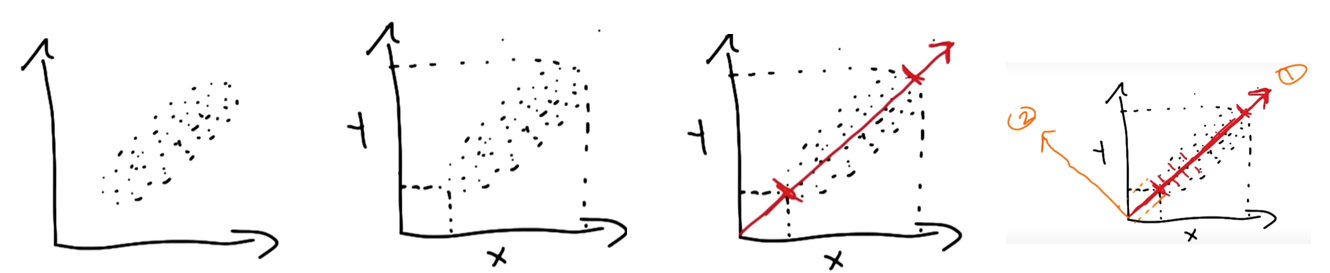

In [17]:
# Generar una instancia de PCA configurado a dos componentes de salida
pca = PCA(n_components=2)

# Transformar los datos
principal_components = pca.fit_transform(X)

# Formar el dataframe final
final_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

final_df = pd.concat([final_df, y], axis = 1)

In [18]:
# Verificar el resultado
final_df.head()

principal_component_1  principal_component_2      Species
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa

In [19]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

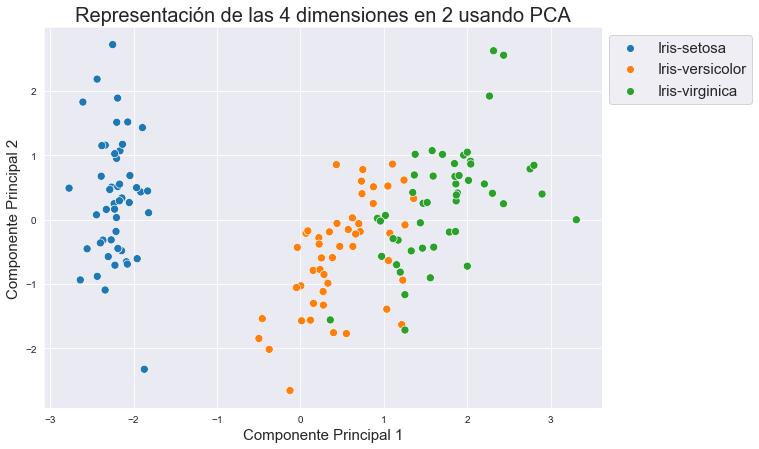

In [20]:
# Gráfica de PCA
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'principal_component_1', y = 'principal_component_2', hue = 'Species', data = final_df, s = 65)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, fontsize = 15)
plt.title('Representación de las 4 dimensiones en 2 usando PCA', fontsize = 20)
plt.xlabel('Componente Principal 1', fontsize = 15)
plt.ylabel('Componente Principal 2', fontsize = 15)
plt.show()

#### Codificar las especies de flores

In [21]:
# Generar una instancia del objeto labelEncoder
# Para transformar los 3 valores de las especies a números: 0,1,2
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Referencias

Créditos a los siguientes autores:

Rahil Parikh: https://www.kaggle.com/code/rprkh15/iris-comprehensive-eda-classification/notebook
Marco Vasquez E: https://www.kaggle.com/code/marcovasquez/top-machine-learning-algorithms-beginner/notebook
Kranti Kumar: https://www.kaggle.com/code/jagannathrk/predicting-breast-cancer-logistic-regression
Azka Rohbiya: https://azkarohbiya.medium.com/iris-species-classification-using-k-neighbors-ae61cd145797
Ronald Fisher: https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x
